<a href="https://www.kaggle.com/code/sivarajsingh/house-price-prediction?scriptVersionId=151599348" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/kagglejson/kaggle.json


### Understanding Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Finding Null Columns

In [6]:
null_column_index = train_data.isnull().sum() > 0

In [7]:
null_columns = train_data.columns[null_column_index.values]

In [8]:
print("{} columns have null values".format(len(null_columns)))

19 columns have null values


In [9]:
null_count = train_data.isnull().sum().to_frame()

In [10]:
null_count = null_count[null_count.iloc[:,0] > 0]

#### First we will impute the missing value columns for the minimum number of missing values

In [11]:
null_count[null_count.iloc[:,0] < 100]

,0
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
GarageType,81
GarageYrBlt,81
GarageFinish,81


### MasVnrArea - Masonry veneer area in square feet --> ***Meaning*** : Covering something with wood for decorative purpose 

103.68526170798899

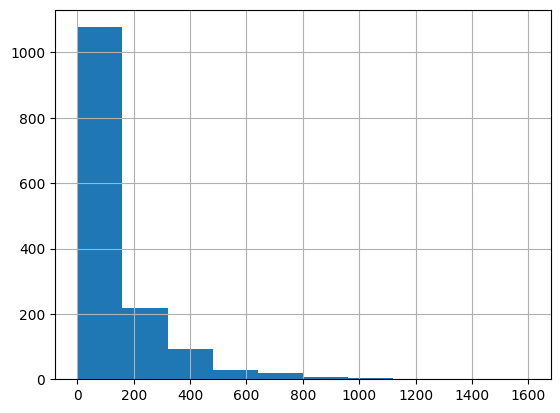

In [12]:
train_data['MasVnrArea'].hist()
train_data['MasVnrArea'].mean()

### If you see most of the ***MasVnrArea*** values are in the 0 to 200 range and mean is 103, we can approximate it to the 100

In [13]:
train_data['MasVnrArea'].fillna(100,inplace=True)

### BsmtQual - Evaluates the height of the basement --> Its a Categorical column

In [14]:
train_data['BsmtQual'].value_counts(dropna=False)

BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: count, dtype: int64

### If you see NaN is meaning of NA - No Basement, So impute the value with category - No


In [15]:
train_data['BsmtQual'].fillna('No',inplace=True)

### BsmtCond - Evaluates the general condition of the basement - Its a Categorical column

In [16]:
train_data['BsmtCond'].value_counts(dropna=False)

BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: count, dtype: int64

### If you see NaN is meaning of NA - No Basement, So impute the value with category - No

In [17]:
train_data['BsmtCond'].fillna('No',inplace=True)

### BsmtExposure -  Refers to walkout or garden level walls - Its a categorical Column

In [18]:
train_data['BsmtExposure'].value_counts(dropna=False)

BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: count, dtype: int64

In [19]:
train_data['BsmtExposure'].fillna('NoBasement',inplace=True)

### BsmtFinType1 - Rating of basement finished area - Its a Categorical Column

In [20]:
train_data['BsmtFinType1'].value_counts(dropna=False)

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: count, dtype: int64

In [21]:
train_data['BsmtFinType1'].fillna('No',inplace=True)

### BsmtFinType2 - Rating of basement finished area (if multiple types) - Its a categorical column

In [22]:
train_data['BsmtFinType2'].value_counts(dropna=False)

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [23]:
train_data['BsmtFinType2'].fillna('No',inplace=True)

### Electrical - Electrical system - Types of Electrical System used - Its a Categorical Column

In [24]:
train_data['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

<Axes: xlabel='Electrical', ylabel='count'>

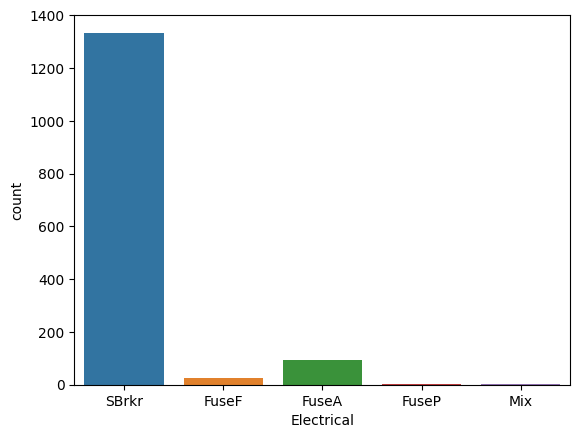

In [25]:
sns.countplot(x='Electrical',data=train_data)

### So most of the houses it uses the SBrkr - Standard Circuit Breakers & Romex  - So will impute with this value

In [26]:
train_data['Electrical'].fillna('SBrkr',inplace=True)

### These columns are missing counts are same
* GarageType	81 - Garage location  - Used for Vechile parking - Categorical Column
* GarageYrBlt	81 - Year garage was built - Date column
* GarageFinish	81 - Interior finish of the garage - Categorical Column 
* GarageQual	81 - Garage quality  - Categorical Column 
* GarageCond	81 - Garage condition - Categorical Column

### If you see NaN is meaning of NA - No Garage, So impute the value with category - No

In [27]:
for i in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    print(train_data[i].value_counts(dropna=False))

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageYrBlt
NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 98, dtype: int64
GarageFinish
Unf    605
RFn    422
Fin    352
NaN     81
Name: count, dtype: int64
GarageQual
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: count, dtype: int64
GarageCond
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: count, dtype: int64


In [28]:
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    train_data[i].fillna('No',inplace=True)

In [29]:
train_data['GarageYrBlt'].fillna(0,inplace=True)

In [30]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype('int')
train_data['GarageYrBlt'].dtypes

dtype('int64')

In [31]:
null_count[null_count.iloc[:,0] >= 100]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
FireplaceQu,690
PoolQC,1453
Fence,1179
MiscFeature,1406


### Now we have null values greater than 200 which we will impute my some ML technique
* LotFrontage	259 - Linear feet of street connected to property - Discrete Numerical Column Type
* Alley	1369        - Type of alley access to property - Object(categorical Type) - NA means No Alley                         Access (Meaning - a narrow passageway between or behind buildings)
* MasVnrType	872 - Masonry Veneer Type - Object(categorical Type) - NA means No Masonry Veneer Work built in House (Meaning - Thin external layer of brick, stone or manufactured stone applied to a surface for decorative effect)
* FireplaceQu	690 - Fireplace quality - Object(categorical Type)
* PoolQC	1453  - Pool quality - Object(categorical Type)
* Fence	1179  - Fence quality - Object(categorical Type)
* MiscFeature	1406 - Miscellaneous feature not covered in other categories - Object(categorical type)


object


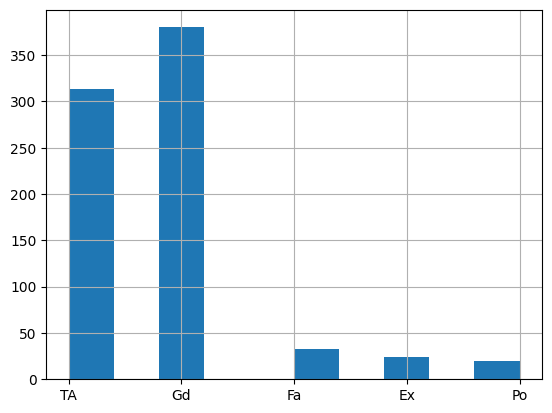

In [32]:
### If you see the Histogram most of the values are in the range 50 - 75 
train_data['FireplaceQu'].hist()
print(train_data['FireplaceQu'].dtype)

In [33]:
for i in ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']:
    train_data[i].fillna('N',inplace=True)
null_columns = train_data.isnull().sum()

In [34]:
null_columns[null_columns > 0]

LotFrontage    259
dtype: int64

### Using Sklearn imputer method will impute the ***LotFrontage*** feature 

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
s = imputer.fit(train_data[['LotFrontage']])
s = imputer.transform(train_data[['LotFrontage']])
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [36]:
train_data['LotFrontage'] = s
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,N,Reg,Lvl,AllPub,...,0,N,N,N,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,N,Reg,Lvl,AllPub,...,0,N,N,N,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,N,IR1,Lvl,AllPub,...,0,N,N,N,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,N,IR1,Lvl,AllPub,...,0,N,N,N,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,N,IR1,Lvl,AllPub,...,0,N,N,N,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,N,Reg,Lvl,AllPub,...,0,N,N,N,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,N,Reg,Lvl,AllPub,...,0,N,MnPrv,N,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,N,Reg,Lvl,AllPub,...,0,N,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,N,Reg,Lvl,AllPub,...,0,N,N,N,0,4,2010,WD,Normal,142125


In [37]:
train_data.isnull().sum() > 0

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [38]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

### Selecting the Integer and Float Columns Separately

In [39]:
df = train_data.select_dtypes(include=['int','float'])
df.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt        int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### We Can encode the date columns in different method, but now we will pass it as the integer itself

In [40]:
df['YrSold'].value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

In [41]:
df1 = train_data.select_dtypes(include='object')

In [42]:
df1.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

### Check the Distribution for Integer Columns

### Will do Bivariate Analysis for Integer columns and Categorical Columns Separately

In [43]:
## Statistical Summary for integer column
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.665068,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569318,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
### Statistical Summary for Categorical Column
df1.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,N,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,N,N,N,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [45]:
### Distribution and Detecting Outliers for Integer Columns
df.columns
## Drop the ID column
df.drop('Id',axis=1,inplace=True)

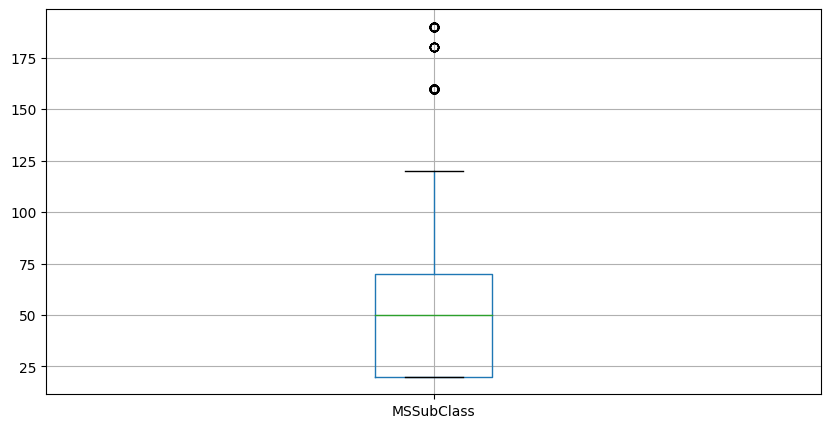

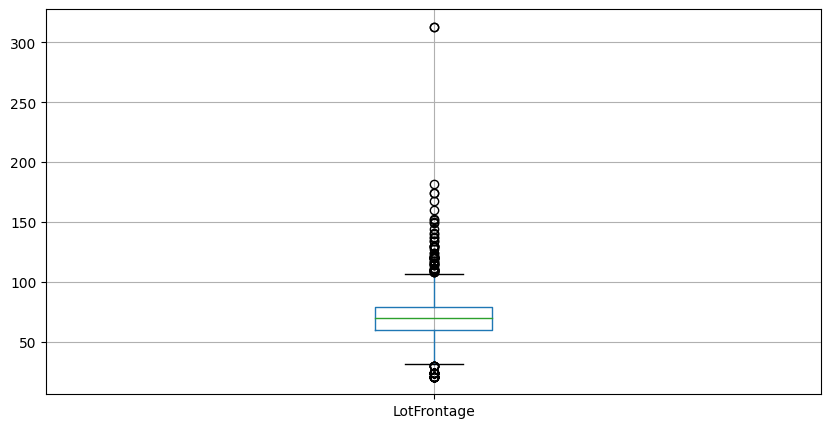

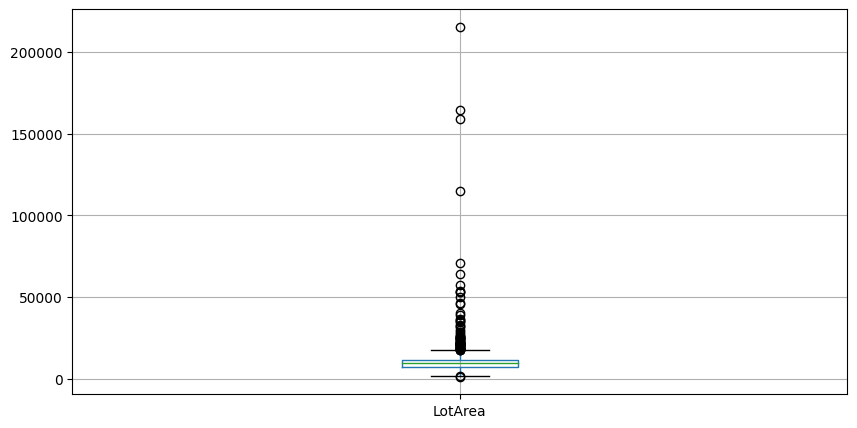

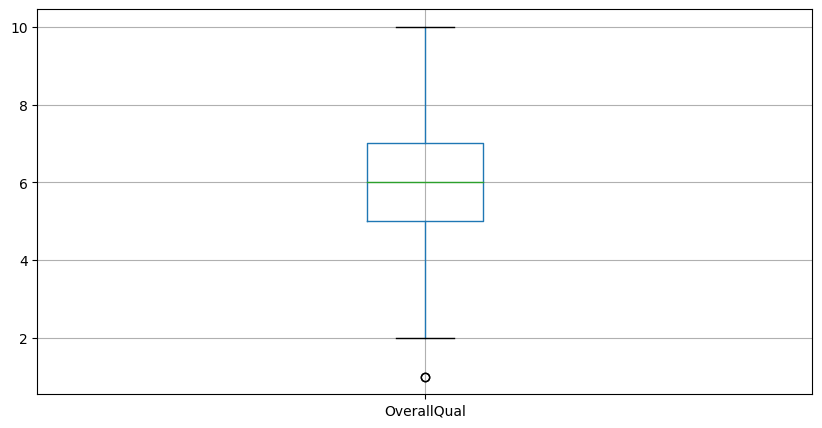

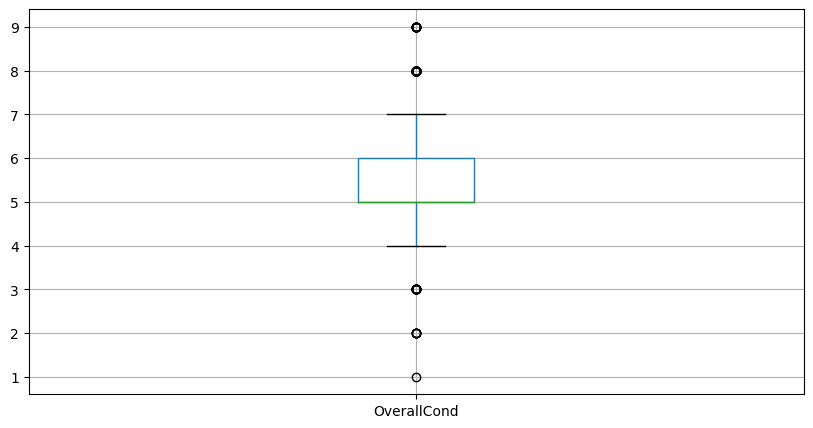

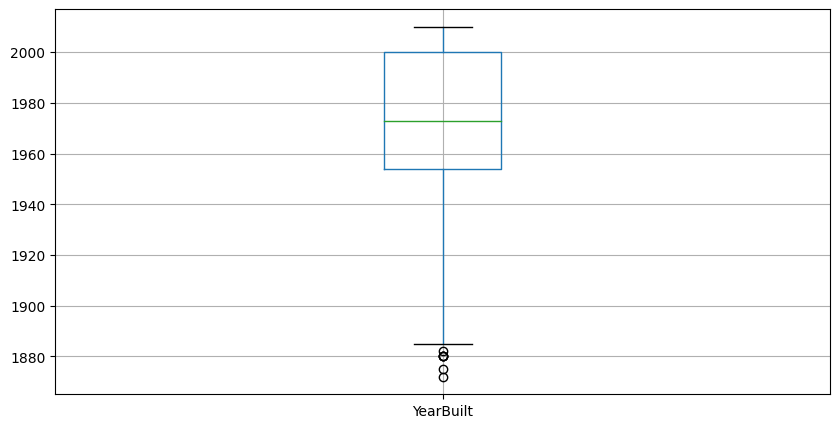

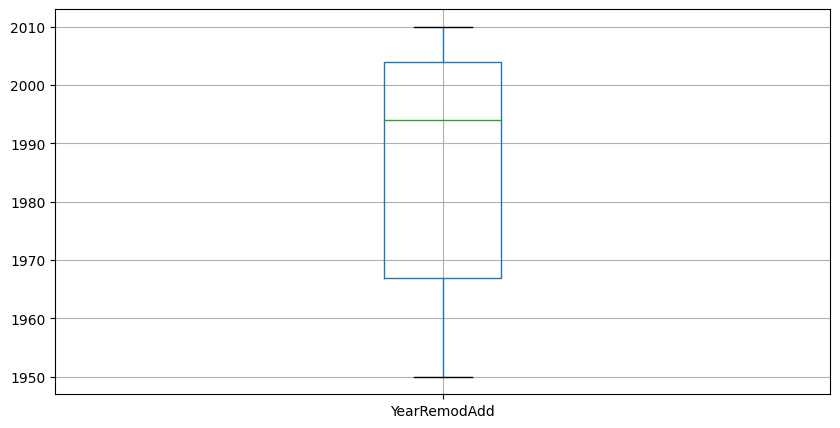

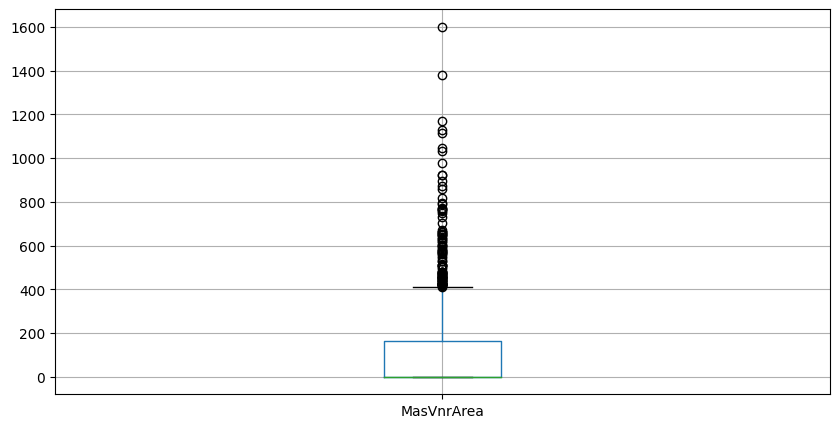

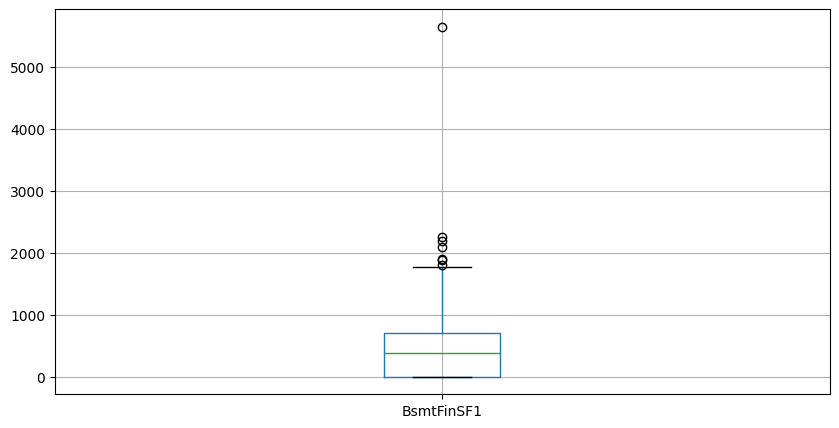

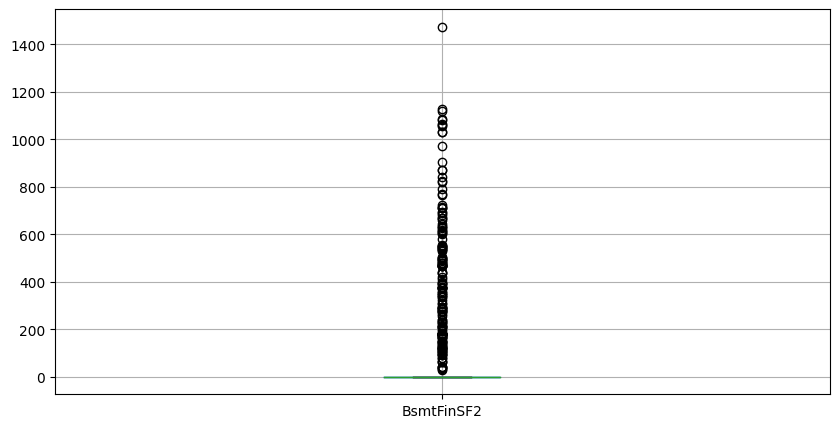

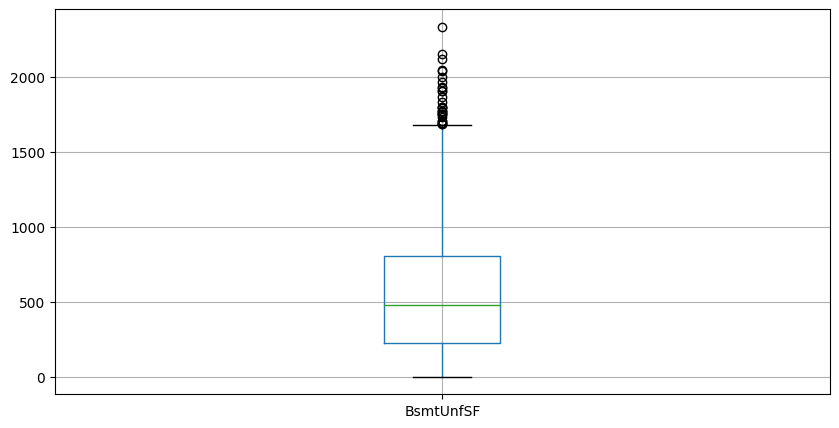

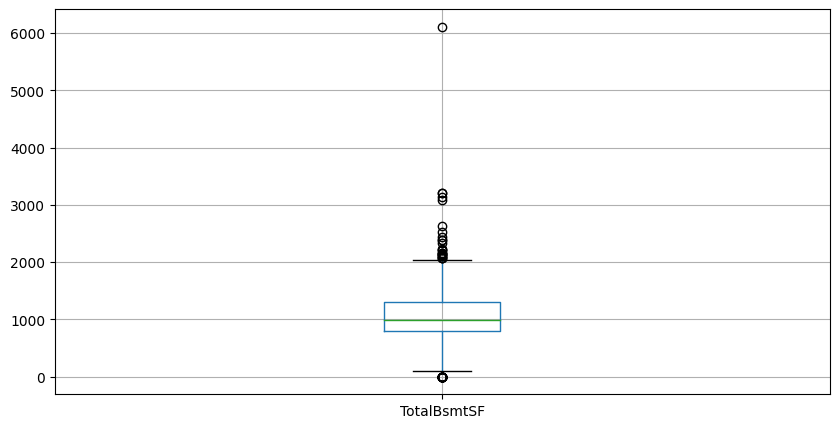

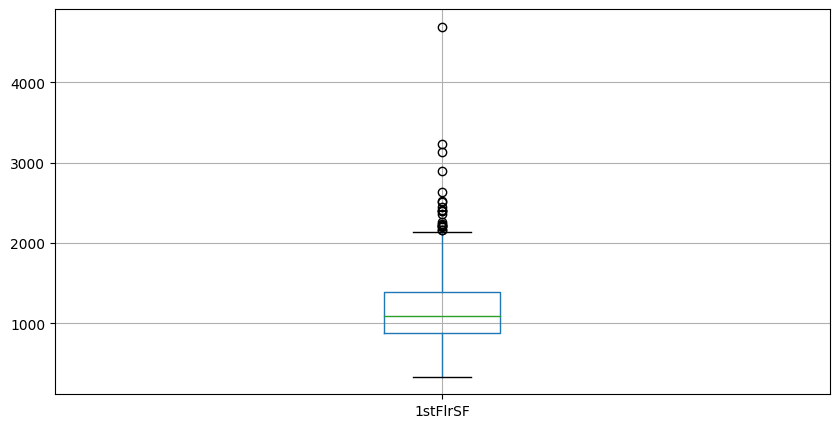

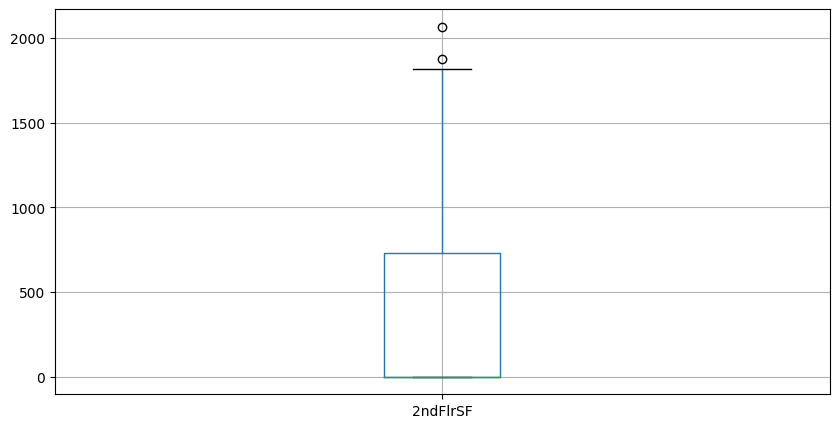

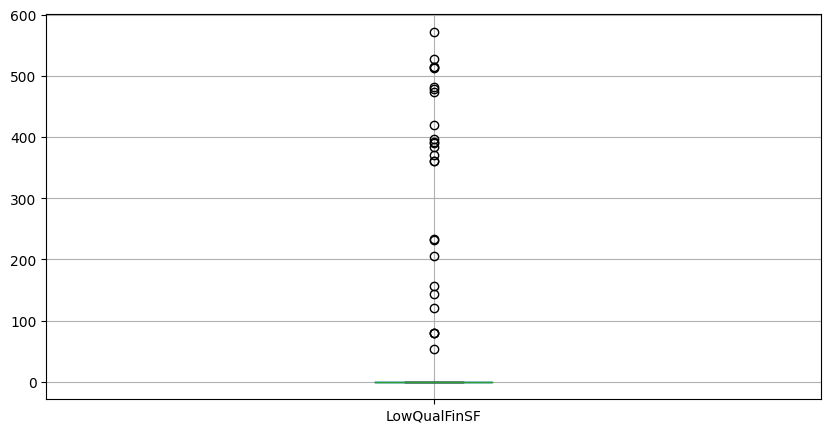

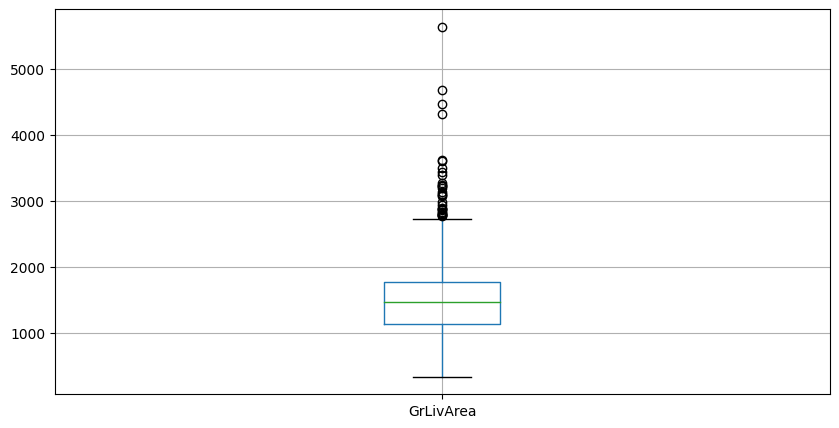

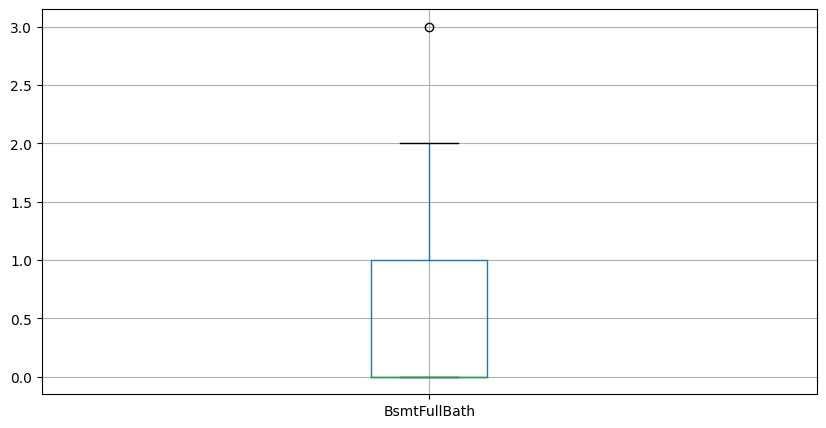

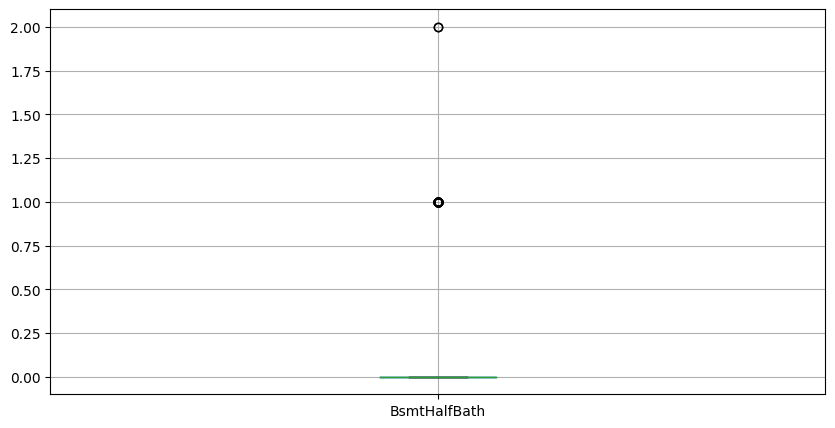

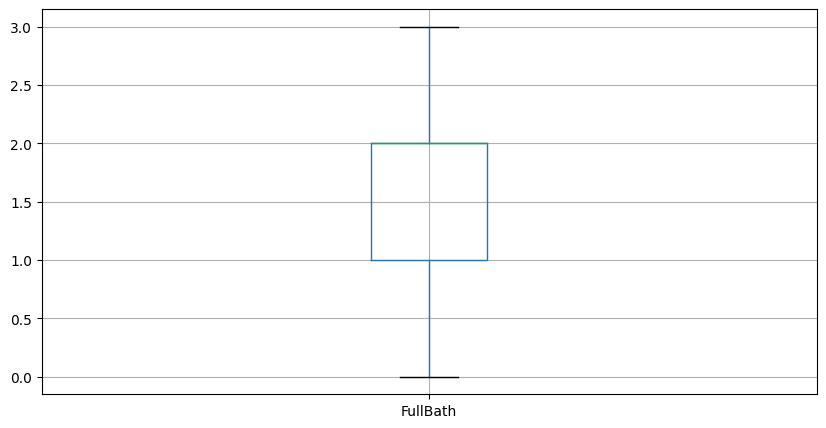

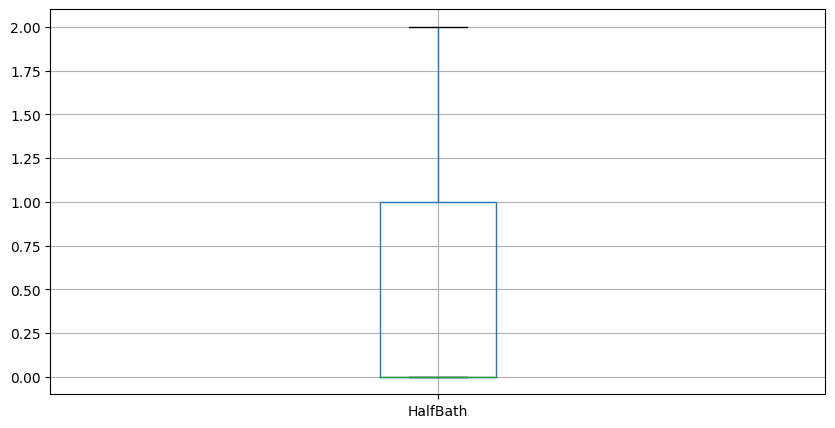

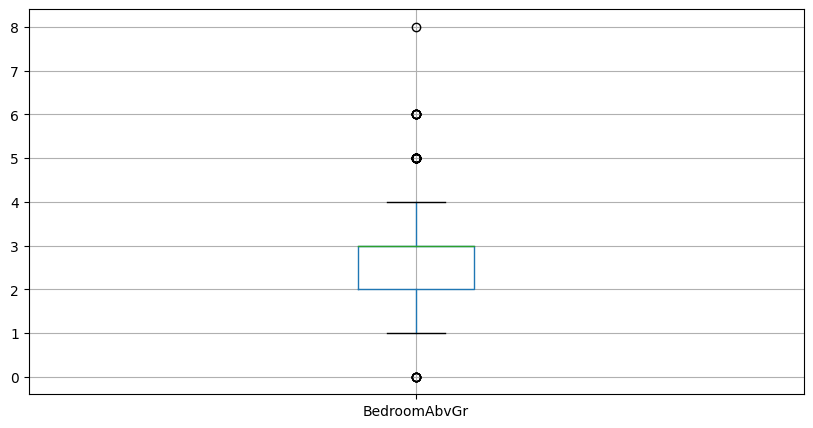

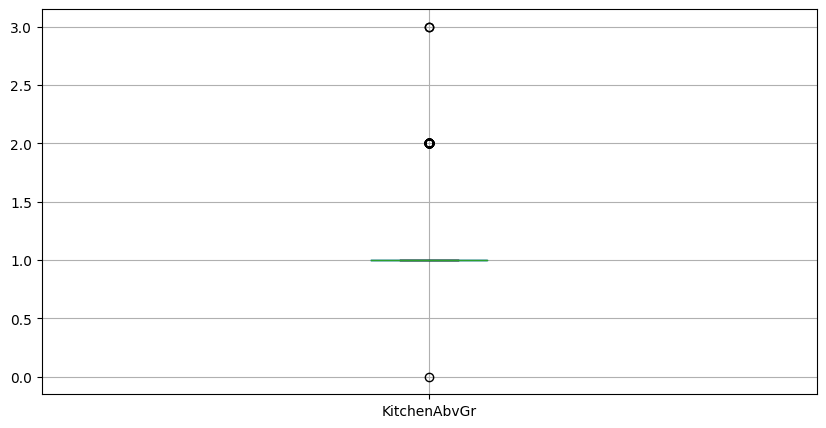

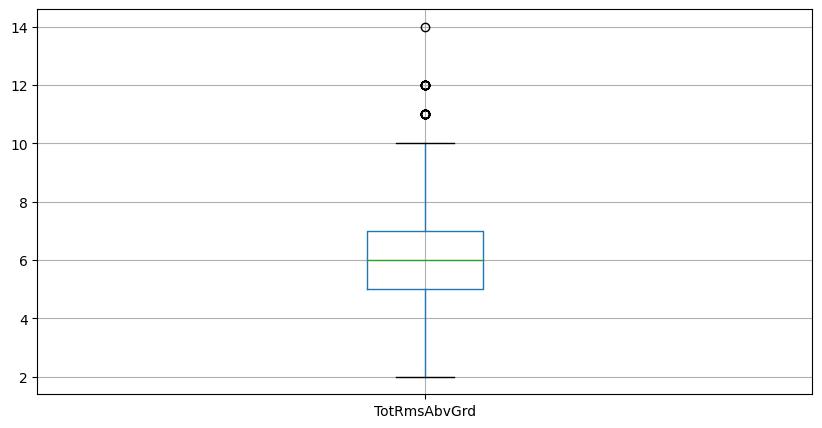

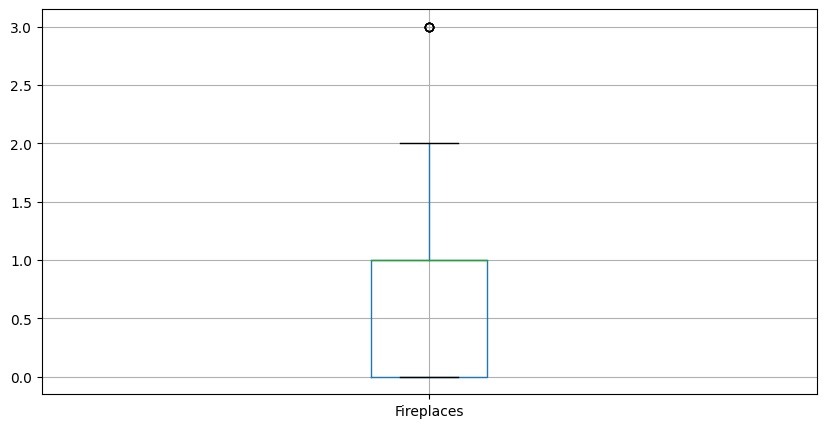

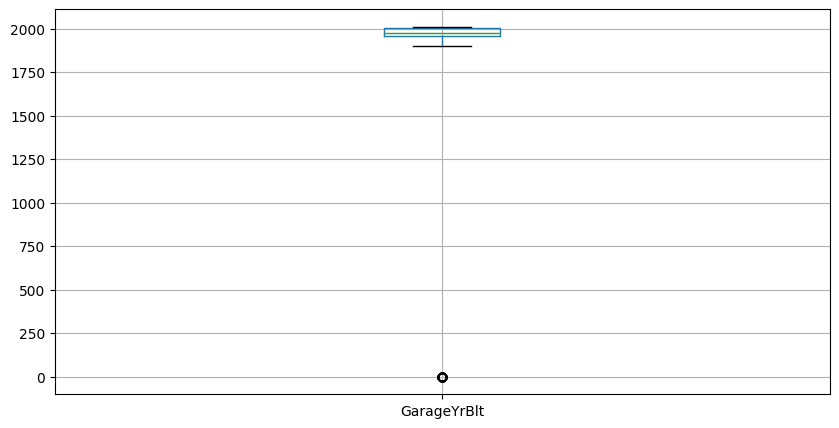

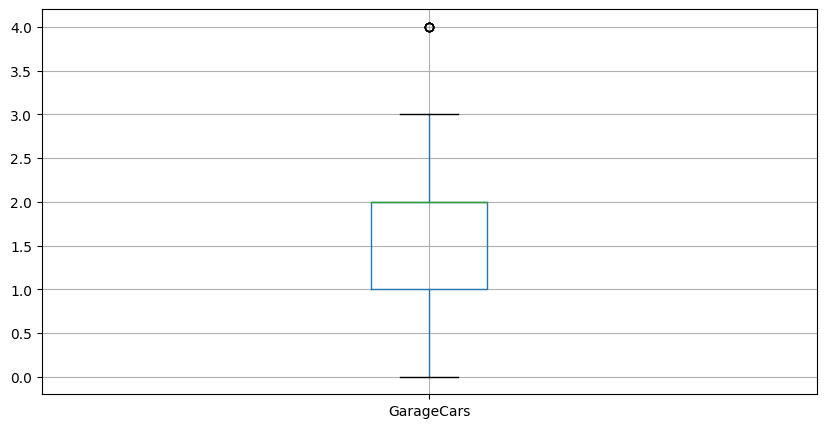

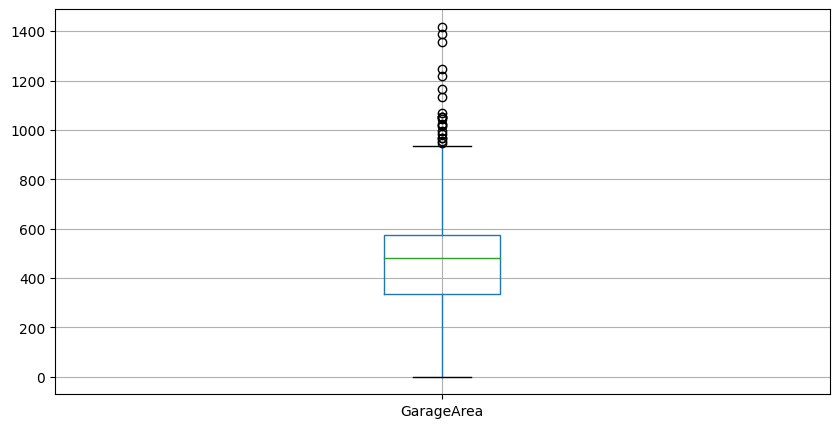

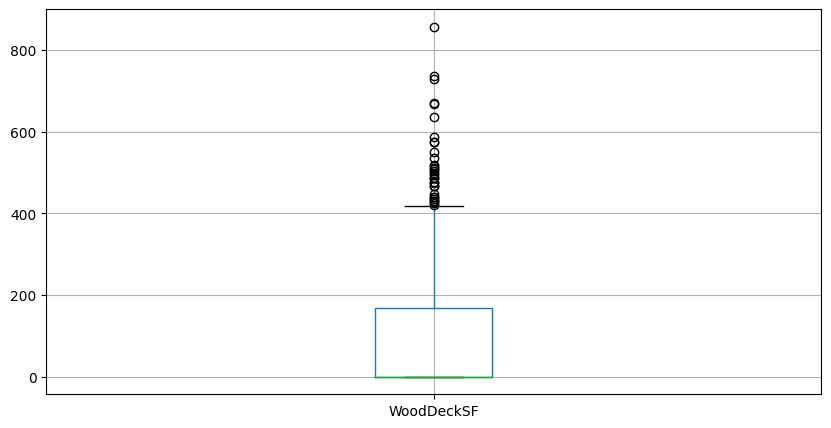

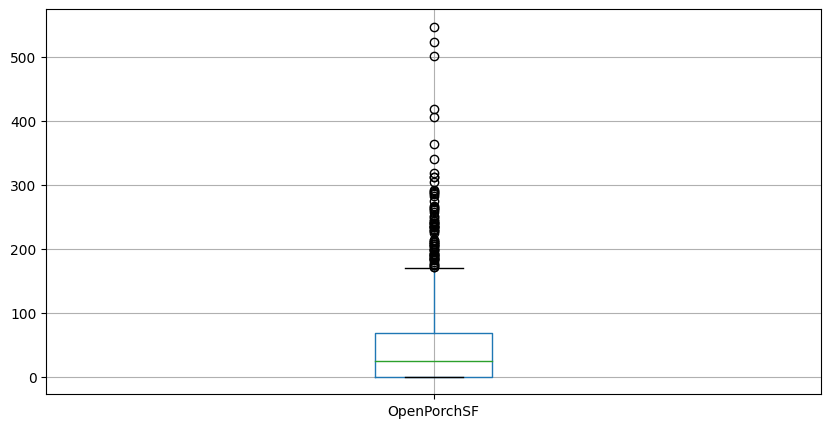

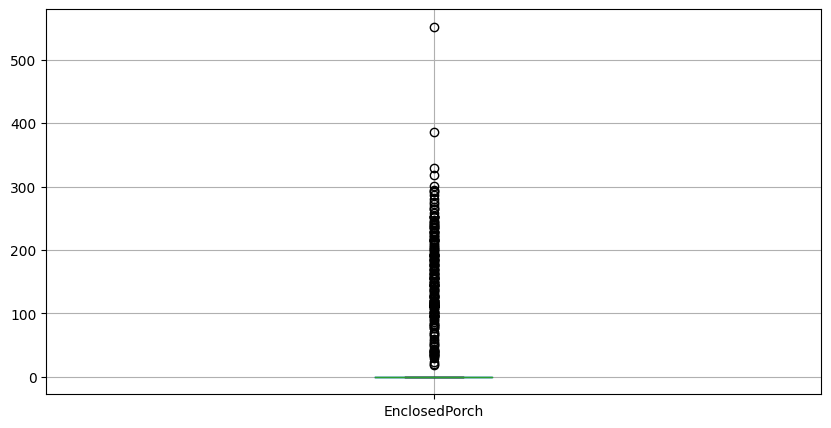

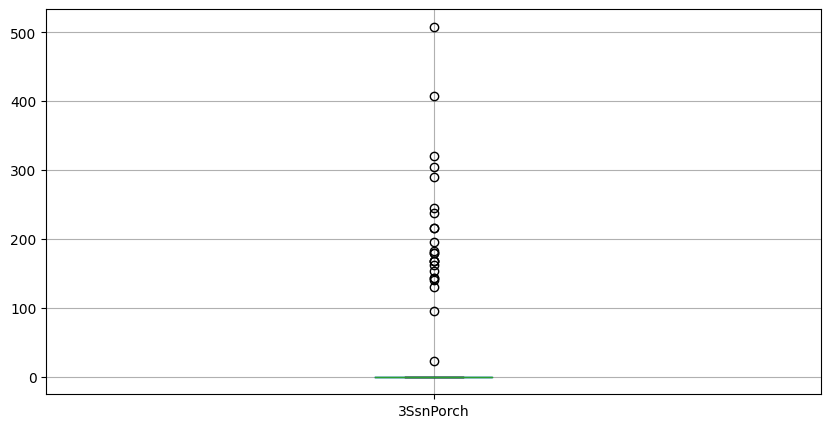

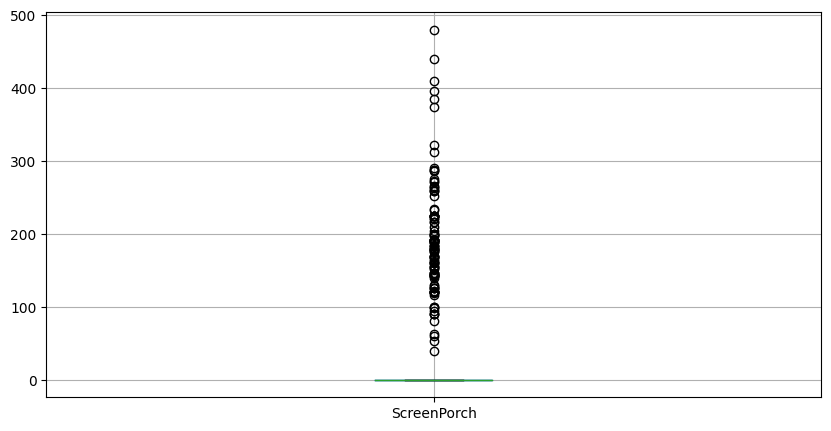

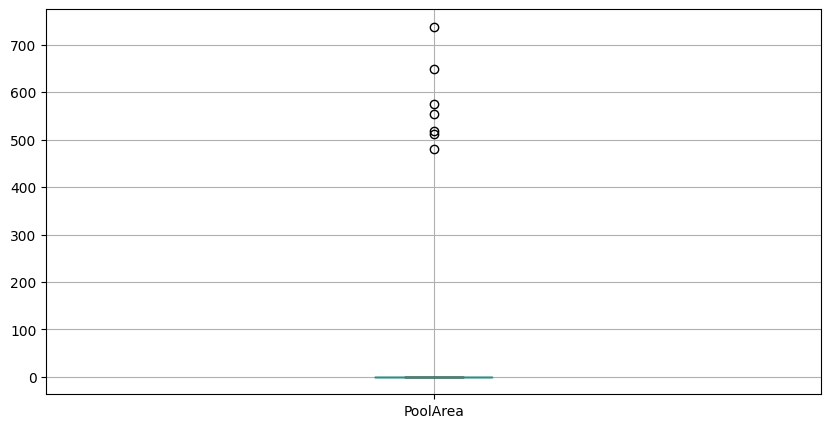

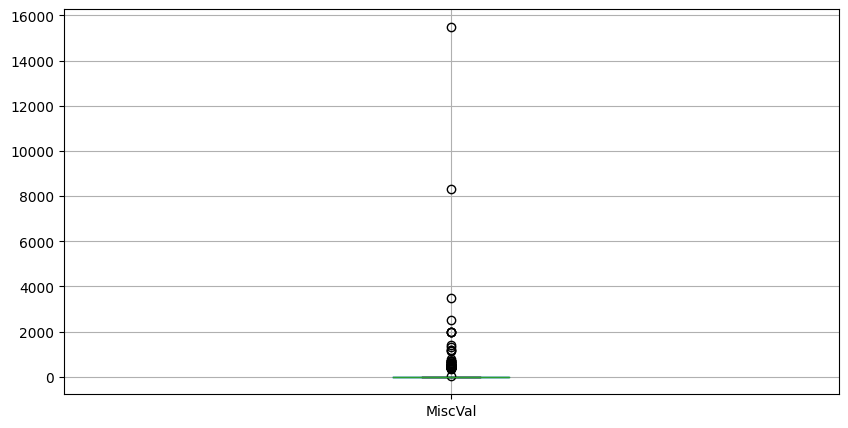

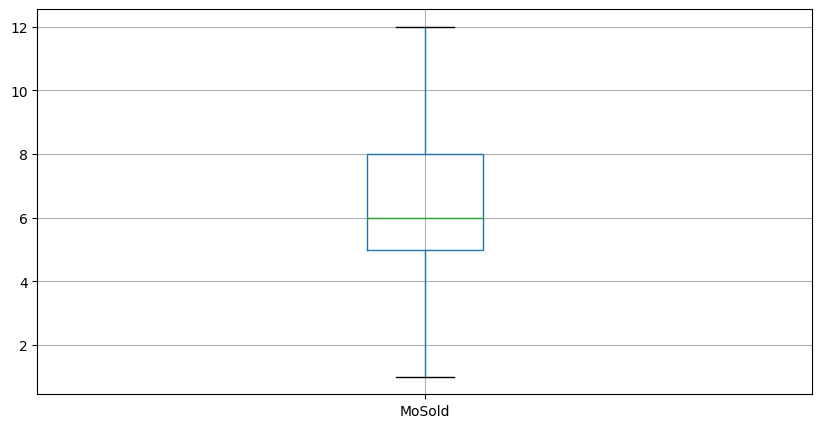

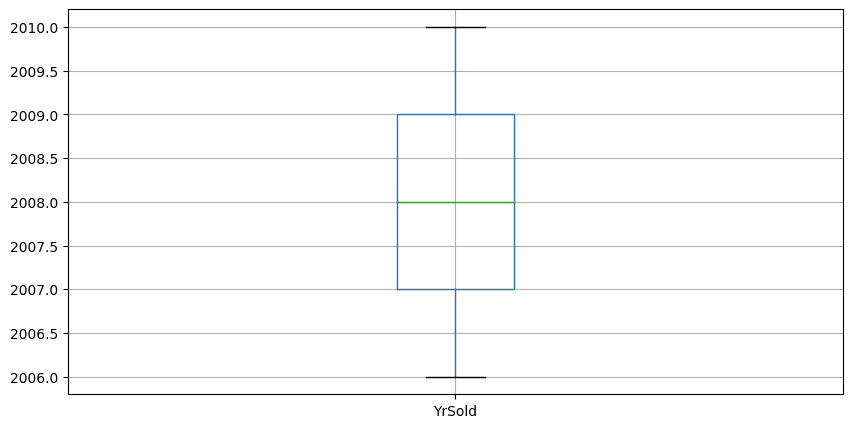

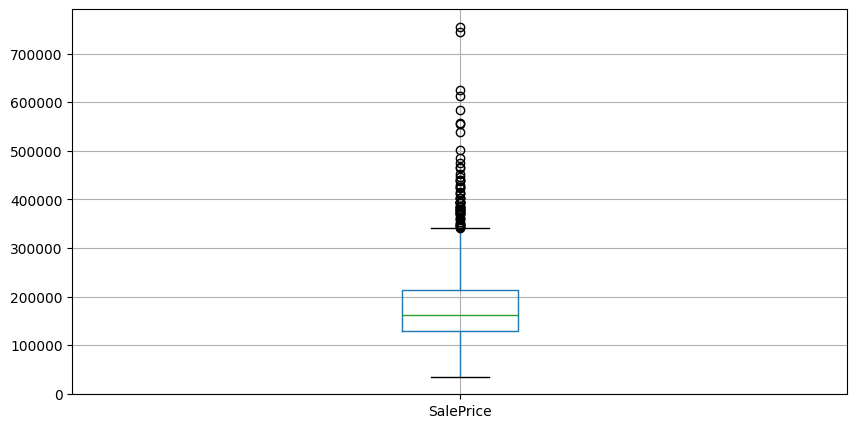

In [46]:
for i in df.columns:
    ax = plt.figure(figsize=(10,5))
    ax = df.boxplot(column=i)
    plt.show()

If you see the above box plot distribution, 
there seems more outliers, because some integer columns are discrete numerical column, 
not a continuous one. 

### Let's Identify the Discrete numerical Column --> Its like Categorical Column
* MSSubClass 
* OverallQual
* OverallCond
* LowQualFinSF
* BsmtFullBath
* BsmtHalfBath
* FullBath
* HalfBath
* BedroomAbvGr
* TotRmsAbvGrd
* Fireplaces
* GarageCars
* MoSold
* YrSold


In [47]:
for i in df.columns:
    print(df[i].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
LotFrontage
70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
137.000000      1
38.000000       1
33.000000       1
150.000000      1
46.000000       1
Name: count, Length: 111, dtype: int64
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
187

<Axes: xlabel='SalePrice', ylabel='Count'>

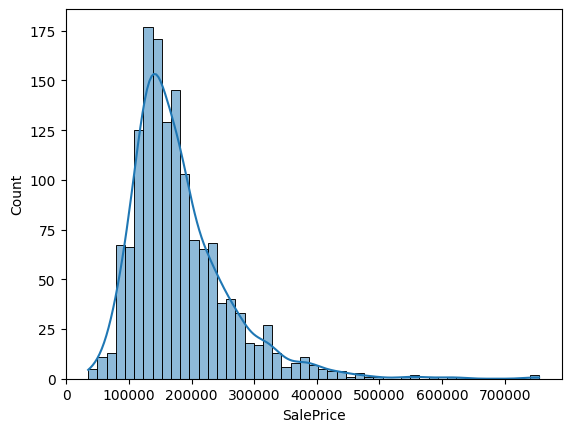

In [48]:
## Distribution of SalePrice, it is Right Skewed,
## Mode < Median < Mean
sns.histplot(data=df,x='SalePrice',kde='True')


<Axes: >

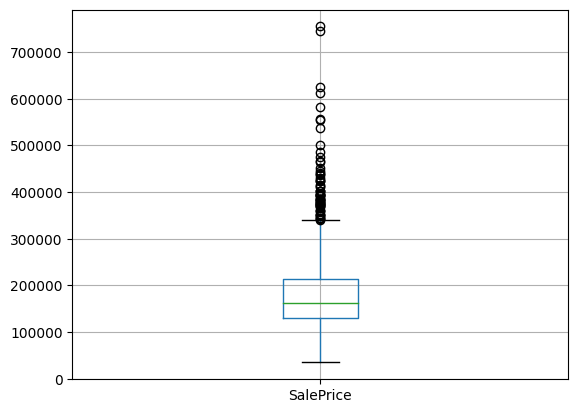

In [49]:
df.boxplot(column='SalePrice')

In [50]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Checking the Distribution and Relationship with the SalePrice

### Scaling and Preprocessing


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [52]:
train_data.drop(columns=['Id'],axis=1,inplace=True)

In [53]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,N,Reg,Lvl,AllPub,Inside,...,0,N,N,N,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,N,Reg,Lvl,AllPub,FR2,...,0,N,N,N,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,N,IR1,Lvl,AllPub,Inside,...,0,N,N,N,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,N,IR1,Lvl,AllPub,Corner,...,0,N,N,N,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,N,IR1,Lvl,AllPub,FR2,...,0,N,N,N,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,N,Reg,Lvl,AllPub,Inside,...,0,N,N,N,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,N,Reg,Lvl,AllPub,Inside,...,0,N,MnPrv,N,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,N,Reg,Lvl,AllPub,Inside,...,0,N,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,N,Reg,Lvl,AllPub,Inside,...,0,N,N,N,0,4,2010,WD,Normal,142125


In [54]:
train_data['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [55]:
label_encoder = LabelEncoder()

# Create a dictionary to store the mapping of original string values to their corresponding numerical labels
label_mapping = {}

# Iterate through each iumn and record the mapping for object (string) types
for i in df1.columns:
    if train_data[i].dtype == 'object':
        # Fit the LabelEncoder to get the classes (unique values)
        label_encoder.fit(train_data[i])
        # convert unique values to numbers
        train_data[i] = label_encoder.fit_transform(train_data[i])
        # Store the mapping in the dictionary
        label_mapping[i] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

label_mapping


{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'N': 1, 'Pave': 2},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'Blmngtn': 0,
  'Blueste': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'ClearCr': 4,
  'CollgCr': 5,
  'Crawfor': 6,
  'Edwards': 7,
  'Gilbert': 8,
  'IDOTRR': 9,
  'MeadowV': 10,
  'Mitchel': 11,
  'NAmes': 12,
  'NPkVill': 13,
  'NWAmes': 14,
  'NoRidge': 15,
  'NridgHt': 16,
  'OldTown': 17,
  'SWISU': 18,
  'Sawyer': 19,
  'SawyerW': 20,
  'Somerst': 21,
  'StoneBr': 22,
  'Timber': 23,
  'Veenker': 24},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'PosA': 3,
  'PosN': 4,
  'RRAe': 5,
  'RRAn': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Artery

In [56]:
#label_encoder = LabelEncoder()
#for objects in df1.columns:
#    label_encoder.fit(train_data[objects])
#    train_data[objects] = label_encoder.fit_transform(train_data[objects])

In [57]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,1,3,3,0,4,...,0,3,4,1,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,1,3,3,0,4,...,0,3,2,1,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,1,3,3,0,4,...,0,3,0,3,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,1,3,3,0,4,...,0,3,4,1,0,4,2010,8,4,142125


## Remove the Target value from the train_data

In [58]:
X = train_data.drop('SalePrice',axis=1)
y = train_data['SalePrice']

In [59]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,1,3,3,0,4,...,0,0,3,4,1,0,8,2007,8,4
1456,20,3,85.0,13175,1,1,3,3,0,4,...,0,0,3,2,1,0,2,2010,8,4
1457,70,3,66.0,9042,1,1,3,3,0,4,...,0,0,3,0,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2010,8,4


In [60]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Scaling

In [61]:
scale = MinMaxScaler(feature_range=(0, 1))
X = scale.fit_transform(X)
X

array([[0.23529412, 0.75      , 0.15068493, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.1609589 , ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.18493151, ..., 0.5       , 1.        ,
        0.8       ]])

### Split train and test data from the training data - This is called Out sample Method

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.3)
X_train

array([[0.17647059, 1.        , 0.16797931, ..., 0.25      , 1.        ,
        0.8       ],
       [0.17647059, 0.75      , 0.13356164, ..., 0.        , 1.        ,
        0.8       ],
       [0.17647059, 1.        , 0.13356164, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.        , 0.75      , 0.16780822, ..., 0.5       , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.15753425, ..., 0.5       , 0.75      ,
        1.        ],
       [0.17647059, 1.        , 0.13356164, ..., 0.25      , 1.        ,
        0.8       ]])

In [63]:
y_train

104     169500
1185    104900
786     139000
379     179000
1129    140000
         ...  
466     167000
299     158500
493     155000
527     446261
1192    125000
Name: SalePrice, Length: 1022, dtype: int64

In [64]:
import xgboost as xgb

In [65]:
model = xgb.XGBRegressor(
    device="cuda", 
    tree_method="approx",
    objective='reg:absoluteerror',
    eval_metric='mae', 
    enable_categorical=True,
    learning_rate=0.02,
    max_depth=20,
    subsample=1,
    colsample_bytree=1,
    n_estimators=450,
    random_state=42,
)

#Training the model on the training data
model.fit(X_train, y_train)

[02:06:17] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cuda', early_stopping_rounds=None, enable_categorical=True,
             eval_metric='mae', feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=450, n_jobs=None, num_parallel_tree=None,
             objective='reg:absoluteerror', ...)

In [66]:
from sklearn import metrics

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculate the mean absolute and squared error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
#print("Mean Relative Error:", metrics.mean_absolute_percentage_error(y_test, predictions))
print("Mean Absolute Percentage:", metrics.mean_absolute_percentage_error(y_test, predictions))

Mean Absolute Error: 32109.291586401258
Mean Absolute Percentage: 0.18086828627826002


In [67]:
#### CatBoostRegressor
from catboost import CatBoostRegressor
cat = CatBoostRegressor(silent=True)
cat.fit(X_train,y_train)
y_pred = cat.predict(X_test)

# Evaluate the model
r2 = metrics.r2_score(y_test, y_pred)
evaluate = metrics.mean_absolute_percentage_error(y_test, y_pred)

print(f"r2: {r2}")
print(f"mean absolute percentage error: {evaluate}")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

r2: 0.8069019632804486
mean absolute percentage error: 0.09315694928129115
Mean Absolute Error: 16456.579534983077


### Error Percentage for each predictions

In [68]:
error_percentage = ((y_test - y_pred) / y_test) * 100

In [69]:
error_table = pd.DataFrame({'ActualPrice' : y_test,
              'PredictedPrice': y_pred,
              'ErrorPercentage': error_percentage})
              

In [70]:
error_table.reset_index(drop=True)

,ActualPrice,PredictedPrice,ErrorPercentage
0,289000,265976.165580,7.966725
1,178000,168732.097663,5.206687
2,359100,288268.659482,19.724684
3,197000,214604.110177,-8.936097
4,224000,223814.758252,0.082697
...,...,...,...
433,105000,100505.250263,4.280714
434,108000,107256.895035,0.688060
435,215000,225259.428455,-4.771827
436,165400,193725.018443,-17.125162


#### Cleaning the Test Data

In [71]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [72]:
null_data = test_data.isnull().sum()

In [73]:
null_data[null_data > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [74]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
s = imputer.fit(test_data[['LotFrontage']])
s = imputer.transform(test_data[['LotFrontage']])
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [75]:
test_data['LotFrontage'] = s

In [76]:
'Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'

('Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature')

In [77]:
impute_map = {
    'PoolQC': 'N',
    'MiscFeature': 'N',
    'Alley': 'N',
    'Fence': 'N',
    'FireplaceQu': 'N',
    'GarageType': 'No',
    'GarageFinish': 'No',
    'GarageQual': 'No',
    'GarageCond': 'No',
    'BsmtExposure': 'NoBasement',
    'BsmtFinType2': 'No',
    'BsmtFinType1': 'No',
    'BsmtCond': 'No',
    'BsmtQual': 'No',
    'MasVnrType': 'N'
}

In [78]:
for key, value in impute_map.items():
    test_data[key].fillna(value,inplace=True)
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,N,Reg,Lvl,AllPub,...,120,0,N,MnPrv,N,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,N,IR1,Lvl,AllPub,...,0,0,N,MnPrv,N,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,N,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,N,IR1,HLS,AllPub,...,144,0,N,N,N,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,N,Reg,Lvl,AllPub,...,0,0,N,MnPrv,Shed,700,7,2006,WD,Normal


In [79]:
numerical_impute = {
    'GarageYrBlt': 0,
    'MasVnrArea': 0
}

In [80]:
for key, value in numerical_impute.items():
    test_data[key].fillna(value,inplace=True)
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,N,Reg,Lvl,AllPub,...,120,0,N,MnPrv,N,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,N,IR1,Lvl,AllPub,...,0,0,N,MnPrv,N,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,N,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,N,IR1,HLS,AllPub,...,144,0,N,N,N,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,N,Reg,Lvl,AllPub,...,0,0,N,MnPrv,Shed,700,7,2006,WD,Normal


In [81]:
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype('int64')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,N,Reg,Lvl,AllPub,...,120,0,N,MnPrv,N,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,N,IR1,Lvl,AllPub,...,0,0,N,MnPrv,N,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,N,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,N,IR1,HLS,AllPub,...,144,0,N,N,N,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,N,Reg,Lvl,AllPub,...,0,0,N,MnPrv,Shed,700,7,2006,WD,Normal


In [82]:
test_data['GarageYrBlt']

0       1961
1       1958
2       1997
3       1998
4       1992
        ... 
1454       0
1455    1970
1456    1960
1457       0
1458    1993
Name: GarageYrBlt, Length: 1459, dtype: int64

In [83]:
categorical_impute = {
    'MSZoning': 'RL',
    'Utilities': 'AllPub',
    'Exterior1st': 'MetalSd',    
    'Exterior2nd': 'MetalSd',
    'BsmtFinSF1': 350.5,
    'BsmtFinSF2': 0,
    'BsmtUnfSF': 460,
    'TotalBsmtSF': 988,
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0,
    'KitchenQual': 'TA',
    'Functional': 'Typ',
    'GarageCars': 2,
    'GarageArea': 480,
    'SaleType': 'WD',
}

In [84]:
for key,value in categorical_impute.items():
    test_data[key].fillna(value,inplace=True)
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,N,Reg,Lvl,AllPub,...,120,0,N,MnPrv,N,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,N,IR1,Lvl,AllPub,...,0,0,N,MnPrv,N,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,N,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,N,IR1,HLS,AllPub,...,144,0,N,N,N,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,N,Reg,Lvl,AllPub,...,0,0,N,MnPrv,Shed,700,7,2006,WD,Normal


In [85]:
test_data['MasVnrType'].value_counts(dropna=False)
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,N,Reg,Lvl,AllPub,...,120,0,N,MnPrv,N,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,N,IR1,Lvl,AllPub,...,0,0,N,MnPrv,N,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,N,IR1,Lvl,AllPub,...,0,0,N,N,N,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,N,IR1,HLS,AllPub,...,144,0,N,N,N,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,N,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,N,Reg,Lvl,AllPub,...,0,0,N,MnPrv,Shed,700,7,2006,WD,Normal


In [86]:
test_data.drop('Id',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,N,Reg,Lvl,AllPub,Inside,...,120,0,N,MnPrv,N,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,N,IR1,Lvl,AllPub,Corner,...,0,0,N,N,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,N,IR1,Lvl,AllPub,Inside,...,0,0,N,MnPrv,N,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,N,IR1,Lvl,AllPub,Inside,...,0,0,N,N,N,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,N,IR1,HLS,AllPub,Inside,...,144,0,N,N,N,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,N,Reg,Lvl,AllPub,Inside,...,0,0,N,N,N,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,N,Reg,Lvl,AllPub,Inside,...,0,0,N,N,N,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,N,Reg,Lvl,AllPub,Inside,...,0,0,N,N,N,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,N,Reg,Lvl,AllPub,Inside,...,0,0,N,MnPrv,Shed,700,7,2006,WD,Normal


In [87]:
test_data['PoolQC'].value_counts()

PoolQC
N     1456
Ex       2
Gd       1
Name: count, dtype: int64

In [88]:
mapping_df_list = []

for i, mapping in label_mapping.items():
    temp_df = pd.DataFrame(list(mapping.items()), columns=['Original_Value', 'Encoded_Value'])
    temp_df['column_Name'] = i
    mapping_df_list.append(temp_df)

final_mapping_df = pd.concat(mapping_df_list)
final_mapping_df.to_csv('mapping.csv', index=False)

In [89]:
mapping_df = pd.read_csv('/kaggle/working/mapping.csv')
mapping_df

,Original_Value,Encoded_Value,column_Name
0,C (all),0,MSZoning
1,FV,1,MSZoning
2,RH,2,MSZoning
3,RL,3,MSZoning
4,RM,4,MSZoning
...,...,...,...
261,AdjLand,1,SaleCondition
262,Alloca,2,SaleCondition
263,Family,3,SaleCondition
264,Normal,4,SaleCondition


In [90]:
# Convert the label mapping DataFrame to a dictionary
label_mapping_dict = {}
for column in mapping_df['column_Name'].unique():
    column_mapping = mapping_df[mapping_df['column_Name'] == column]
    label_mapping_dict[column] = dict(zip(column_mapping['Original_Value'], column_mapping['Encoded_Value']))


# we would replace the values in each column using the mapping
for column, mapping in label_mapping_dict.items():
    if column in test_data.columns:
        test_data[column] = test_data[column].map(mapping)
label_mapping_dict

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'N': 1, 'Pave': 2},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'Blmngtn': 0,
  'Blueste': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'ClearCr': 4,
  'CollgCr': 5,
  'Crawfor': 6,
  'Edwards': 7,
  'Gilbert': 8,
  'IDOTRR': 9,
  'MeadowV': 10,
  'Mitchel': 11,
  'NAmes': 12,
  'NPkVill': 13,
  'NWAmes': 14,
  'NoRidge': 15,
  'NridgHt': 16,
  'OldTown': 17,
  'SWISU': 18,
  'Sawyer': 19,
  'SawyerW': 20,
  'Somerst': 21,
  'StoneBr': 22,
  'Timber': 23,
  'Veenker': 24},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'PosA': 3,
  'PosN': 4,
  'RRAe': 5,
  'RRAn': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Artery

In [91]:
test_data.drop('Id',axis=1,inplace=True)

In [92]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,1,3,3,0,4,...,120,0,3,2,1,0,6,2010,8,4
1,20,3,81.0,14267,1,1,0,3,0,0,...,0,0,3,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,1,0,3,0,4,...,0,0,3,2,1,0,3,2010,8,4
3,60,3,78.0,9978,1,1,0,3,0,4,...,0,0,3,4,1,0,6,2010,8,4
4,120,3,43.0,5005,1,1,0,1,0,4,...,144,0,3,4,1,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,1,3,3,0,4,...,0,0,3,4,1,0,6,2006,8,4
1455,160,4,21.0,1894,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2006,8,0
1456,20,3,160.0,20000,1,1,3,3,0,4,...,0,0,3,4,1,0,9,2006,8,0
1457,85,3,62.0,10441,1,1,3,3,0,4,...,0,0,3,2,3,700,7,2006,8,4


In [93]:
test_data = scale.transform(test_data)
test_data

array([[0.        , 0.5       , 0.20205479, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20547945, ..., 1.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.18150685, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.        , 0.75      , 0.4760274 , ..., 0.        , 1.        ,
        0.        ],
       [0.38235294, 0.75      , 0.14041096, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.18150685, ..., 0.        , 1.        ,
        0.8       ]])

In [94]:
test_data

array([[0.        , 0.5       , 0.20205479, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20547945, ..., 1.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.18150685, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.        , 0.75      , 0.4760274 , ..., 0.        , 1.        ,
        0.        ],
       [0.38235294, 0.75      , 0.14041096, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.18150685, ..., 0.        , 1.        ,
        0.8       ]])

In [95]:
test_data_pred = model.predict(test_data)
test_data_pred

array([156362.03, 165675.97, 206717.64, ..., 156684.84, 164493.88,
       185080.44], dtype=float32)

In [96]:
test_data_pred = test_data_pred.reshape(-1)
test_data_pred = pd.DataFrame({
    'Id': range(1461, 1461 + len(test_data_pred.flatten())),
    'SalePrice': test_data_pred.flatten()
})
test_data_pred = test_data_pred.set_index('Id')
test_data_pred

,SalePrice
Id,
1461,156362.031250
1462,165675.968750
1463,206717.640625
1464,204954.234375
1465,310905.125000
...,...
2915,76952.812500
2916,81581.250000
2917,156684.843750


In [97]:
test_data_pred.to_csv('submission.csv')